In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**In this dataset first row is region name and second row is column names and this information repeated for second region in location 124, 125 and 126 then we should handel this issue for this following steps will apply:**
1. Read file
2. Save data with 14 colunms as valid data 
3. Save data as invalid if it has not 14 columns or the values are not numeric
4. Solve the problem of rows with less that 14 columns if possible
5. Add corrected rows to valid data
6. Create dataset
7. Add region field 
8. Transfer Class column with one hot encoding
9. Convert data into number

In [83]:
# Step 1, 2 ,3
valid_data = []
invalid_data = {}
i = 0
with open('Algerian_forest_fires_dataset_UPDATE.csv') as file :
    # Read data
    lines= file.readlines()
    for line in lines:
        line_list = line.split(',')
        line_list = [x.strip() for x in line_list]
        if len(line_list) < 14 :
            # Save invalid data with less than 14 columns
            invalid_data[i] = line_list
            i+=1
        elif not(line_list[0].isdigit()) :
            # Save columns names as invalid data
            invalid_data[i] = line_list
            i+=1
        else:
            # Save valid data
            valid_data.append(line_list)
            i+=1

In [84]:
# Sample of valid data
valid_data[0]

['01',
 '06',
 '2012',
 '29',
 '57',
 '18',
 '0',
 '65.7',
 '3.4',
 '7.6',
 '1.3',
 '3.4',
 '0.5',
 'not fire']

In [85]:
# Invalid data
invalid_data

{0: ['Bejaia Region Dataset'],
 1: ['day',
  'month',
  'year',
  'Temperature',
  'RH',
  'Ws',
  'Rain',
  'FFMC',
  'DMC',
  'DC',
  'ISI',
  'BUI',
  'FWI',
  'Classes'],
 124: [''],
 125: ['Sidi-Bel Abbes Region Dataset'],
 126: ['day',
  'month',
  'year',
  'Temperature',
  'RH',
  'Ws',
  'Rain',
  'FFMC',
  'DMC',
  'DC',
  'ISI',
  'BUI',
  'FWI',
  'Classes'],
 170: ['14',
  '07',
  '2012',
  '37',
  '37',
  '18',
  '0.2',
  '88.9',
  '12.9',
  '14.6 9',
  '12.5',
  '10.4',
  'fire']}

In [86]:
# Solving the problem of row with less than 14 columns
temp = invalid_data[170][9].split(' ')
invalid_data[170][9] = temp[0]
invalid_data[170].insert(10 , temp[1])
invalid_data[170]

['14',
 '07',
 '2012',
 '37',
 '37',
 '18',
 '0.2',
 '88.9',
 '12.9',
 '14.6',
 '9',
 '12.5',
 '10.4',
 'fire']

In [87]:
# Insert crrected data into valid data
valid_data.insert(170 , invalid_data[170])

In [88]:
# Create dataset
df= pd.DataFrame(valid_data ,columns= invalid_data[1])
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [89]:
# Add Region field
region_dict = {0 : 'Bejaia' , 1 : 'Sidi-Bel Abbes'}
df.loc[:121,'Region'] ='Bejaia'
df.loc[122:,'Region'] = 'Sidi-Bel Abbes'

In [90]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


**All the data expect Classes column are numeric but here they present as Object, then the first thing is to convert type of data
before converting check the missing values and as per following report all the columns have 1 missing value then it is better we check whether it is in same record or not**

In [91]:
# Cheking missing values
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [92]:
#df['Classes'].value_counts()

In [93]:
# One hot encoding for Classes column
#Class_dict = {1 : 'fire' , 0 : 'not fire'}
#df['Classes'].replace('fire' , 1, inplace = True)
#df['Classes'].replace('not fire' , 0, inplace = True)

In [94]:
#df['Classes'].value_counts()

In [95]:
# Change data to number
cols = df.columns[:-2]
df[cols] = df[cols].apply(pd.to_numeric)

### Statistical Analysis

In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4


#### Report:
- It seems most of the columns have some outliers that should verified more
- value of Year is same for all rows


In [97]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000e+00,8.335741e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.179301,0.517224,0.350234
month,8.335741e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.063545,0.085567,0.081732
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191
DC,5.279285e-01,1.276719e-01,NaN,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041


#### Report:
- There is high correlation between DMC and DC, BUI, FWI
- There is high coorelation between DC and  BUI
- There is high coorelation between FWI and  BUI
- Classes almost have good positive correlation with ther variables expect RH, Ws and rain

In [98]:
df.skew()

day            0.002806
month          0.000000
year           0.000000
Temperature   -0.196309
RH            -0.237964
Ws             0.545881
Rain           4.579071
FFMC          -1.325633
DMC            1.527652
DC             1.479042
ISI            1.126950
BUI            1.458466
FWI            1.143243
dtype: float64

##### It seems data are not skew but we need to check it with the help of charts

## Visualization
### Univariate visualization

<AxesSubplot: xlabel='Classes', ylabel='count'>

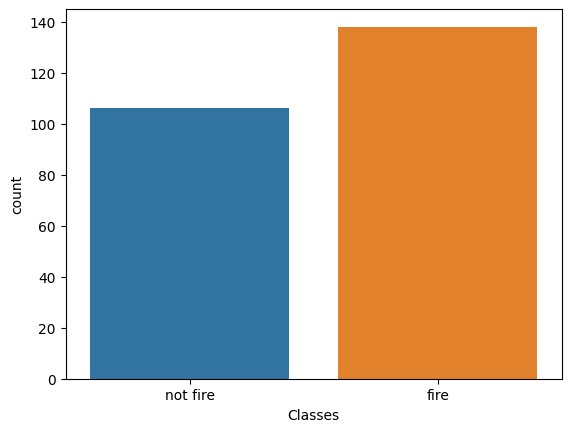

In [99]:
sns.countplot(df , x = df['Classes'])
#plt.xticks(ticks=[0,1] , labels=['not fire','fire']);

<AxesSubplot: xlabel='Region', ylabel='count'>

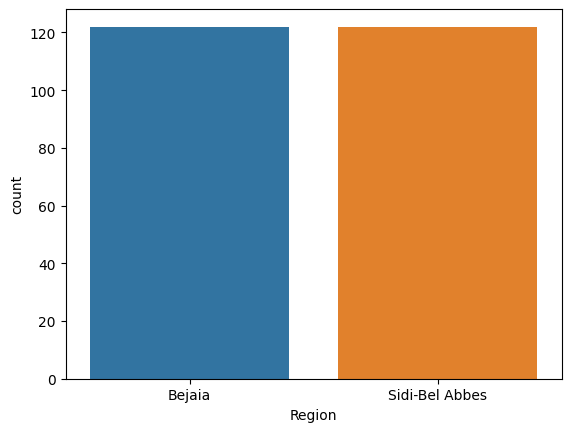

In [100]:
sns.countplot(df , x = df['Region'])
#plt.xticks(ticks=[0,1] , labels=['Bejaia' ,'Sidi-Bel Abbes']);

In [101]:
df['month'].unique()

array([6, 7, 8, 9], dtype=int64)

In [102]:
df['year'].unique()

array([2012], dtype=int64)

**Yers has only one value then in future we can drop it**

In [103]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

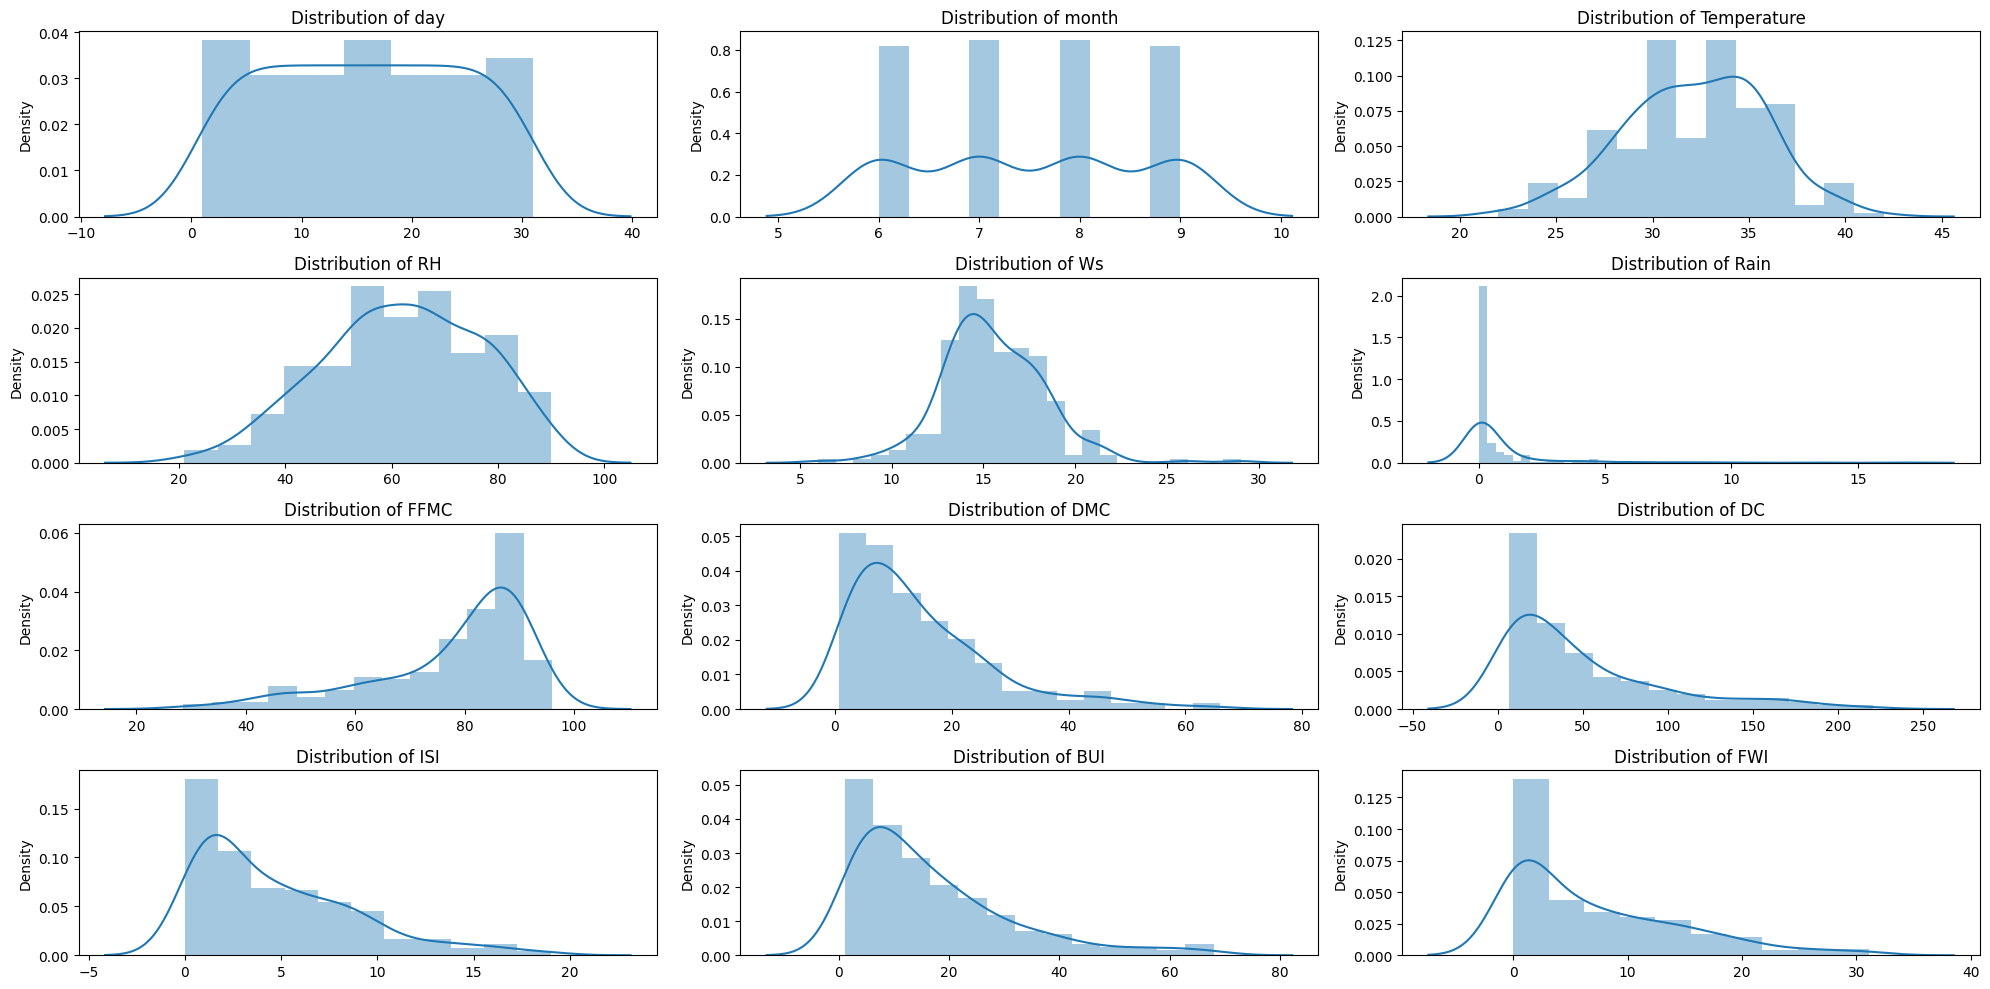

In [104]:
i = 1
plt.figure(figsize=(20,10))
for col in cols:
    if col not in ['year','Region', 'Classes']:
        plt.subplot(4, 3 , i)
        sns.distplot(df[col])
        plt.title(f'Distribution of {col}')
        plt.xlabel('')
        plt.tight_layout()
        i +=1

#### Report:
- FFMC is left skew
- DMC, DC, ISI, BUI and FWI are right skew
- There is some outlier in WS
- The amountf rain limited between 0 to 5 and there are some outliers

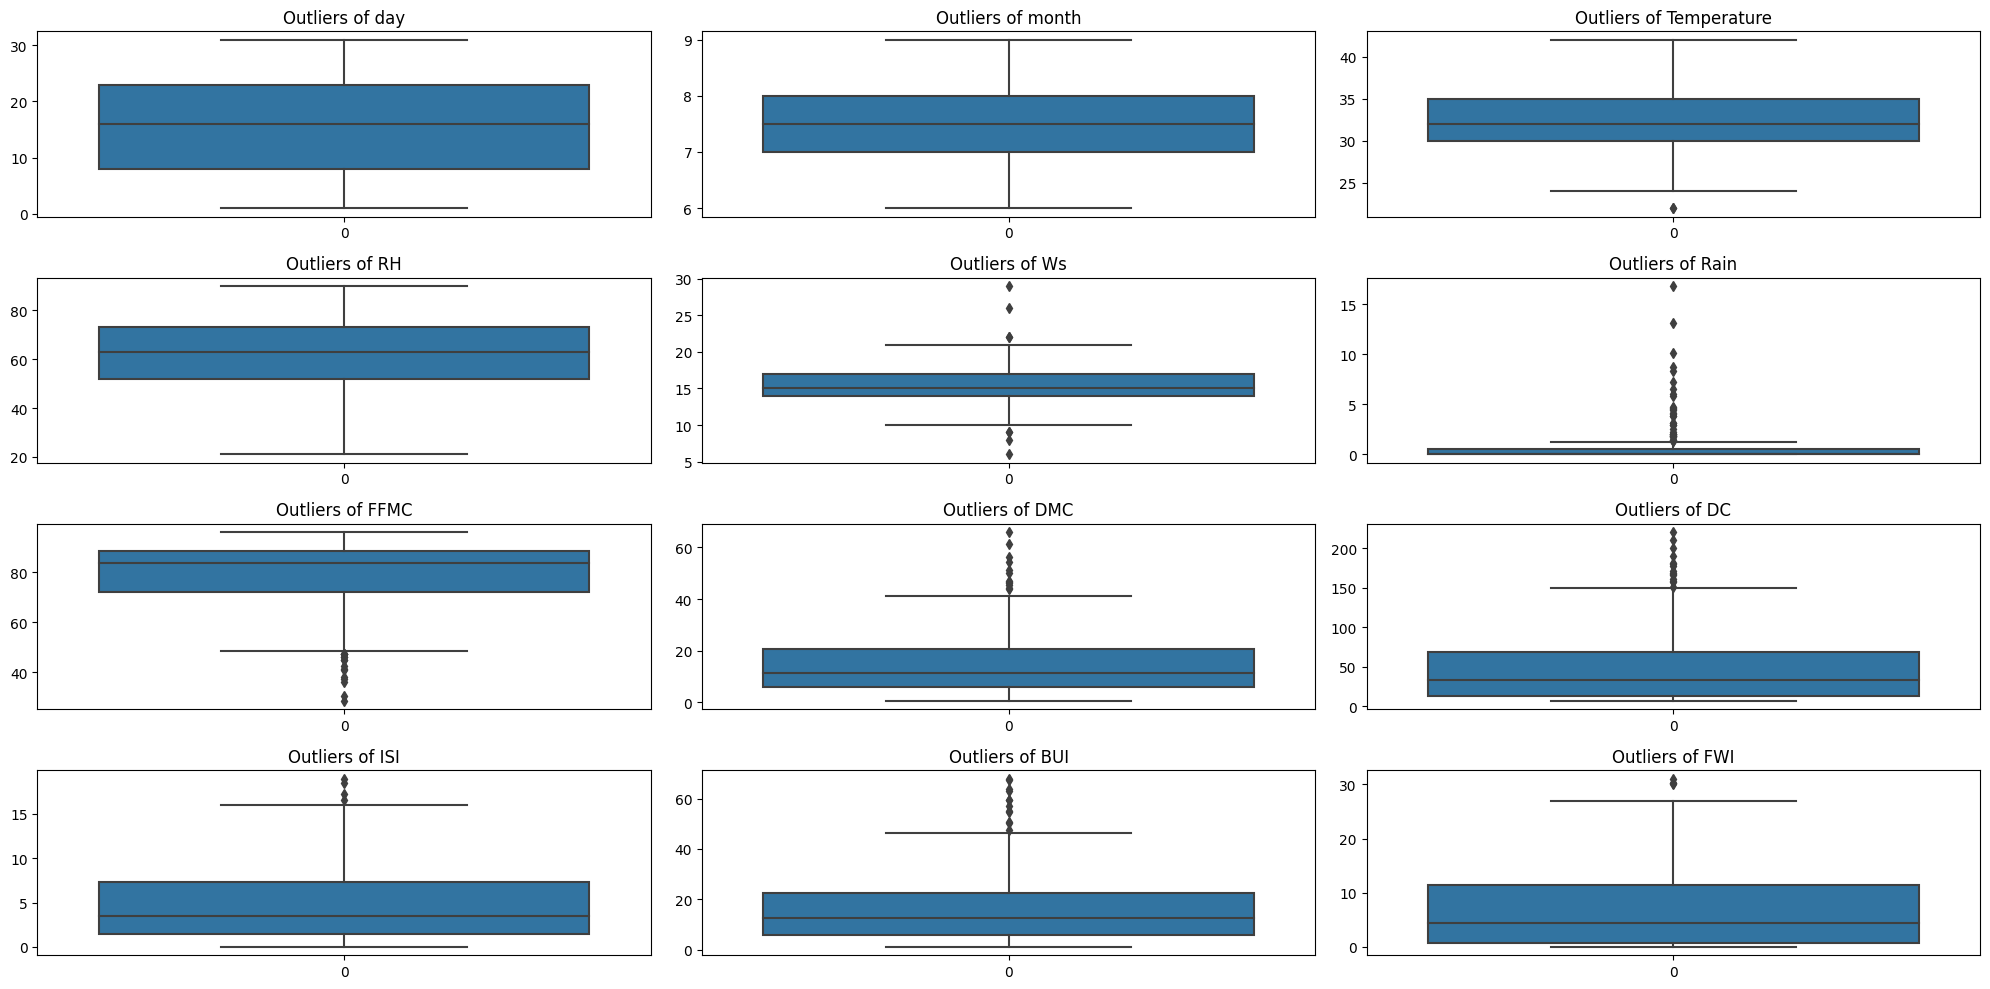

In [105]:
i = 1
plt.figure(figsize=(20,10))
for col in cols:
    if col not in ['year','Region', 'Classes']:
        plt.subplot(4, 3 , i)
        sns.boxplot(df[col])
        plt.title(f'Outliers of {col}')
        plt.xlabel('')
        plt.tight_layout()
        i +=1

Some of the fields have many outliers such as Ws, Rain, DMC, DC, ISI and BUI
### Biovariate

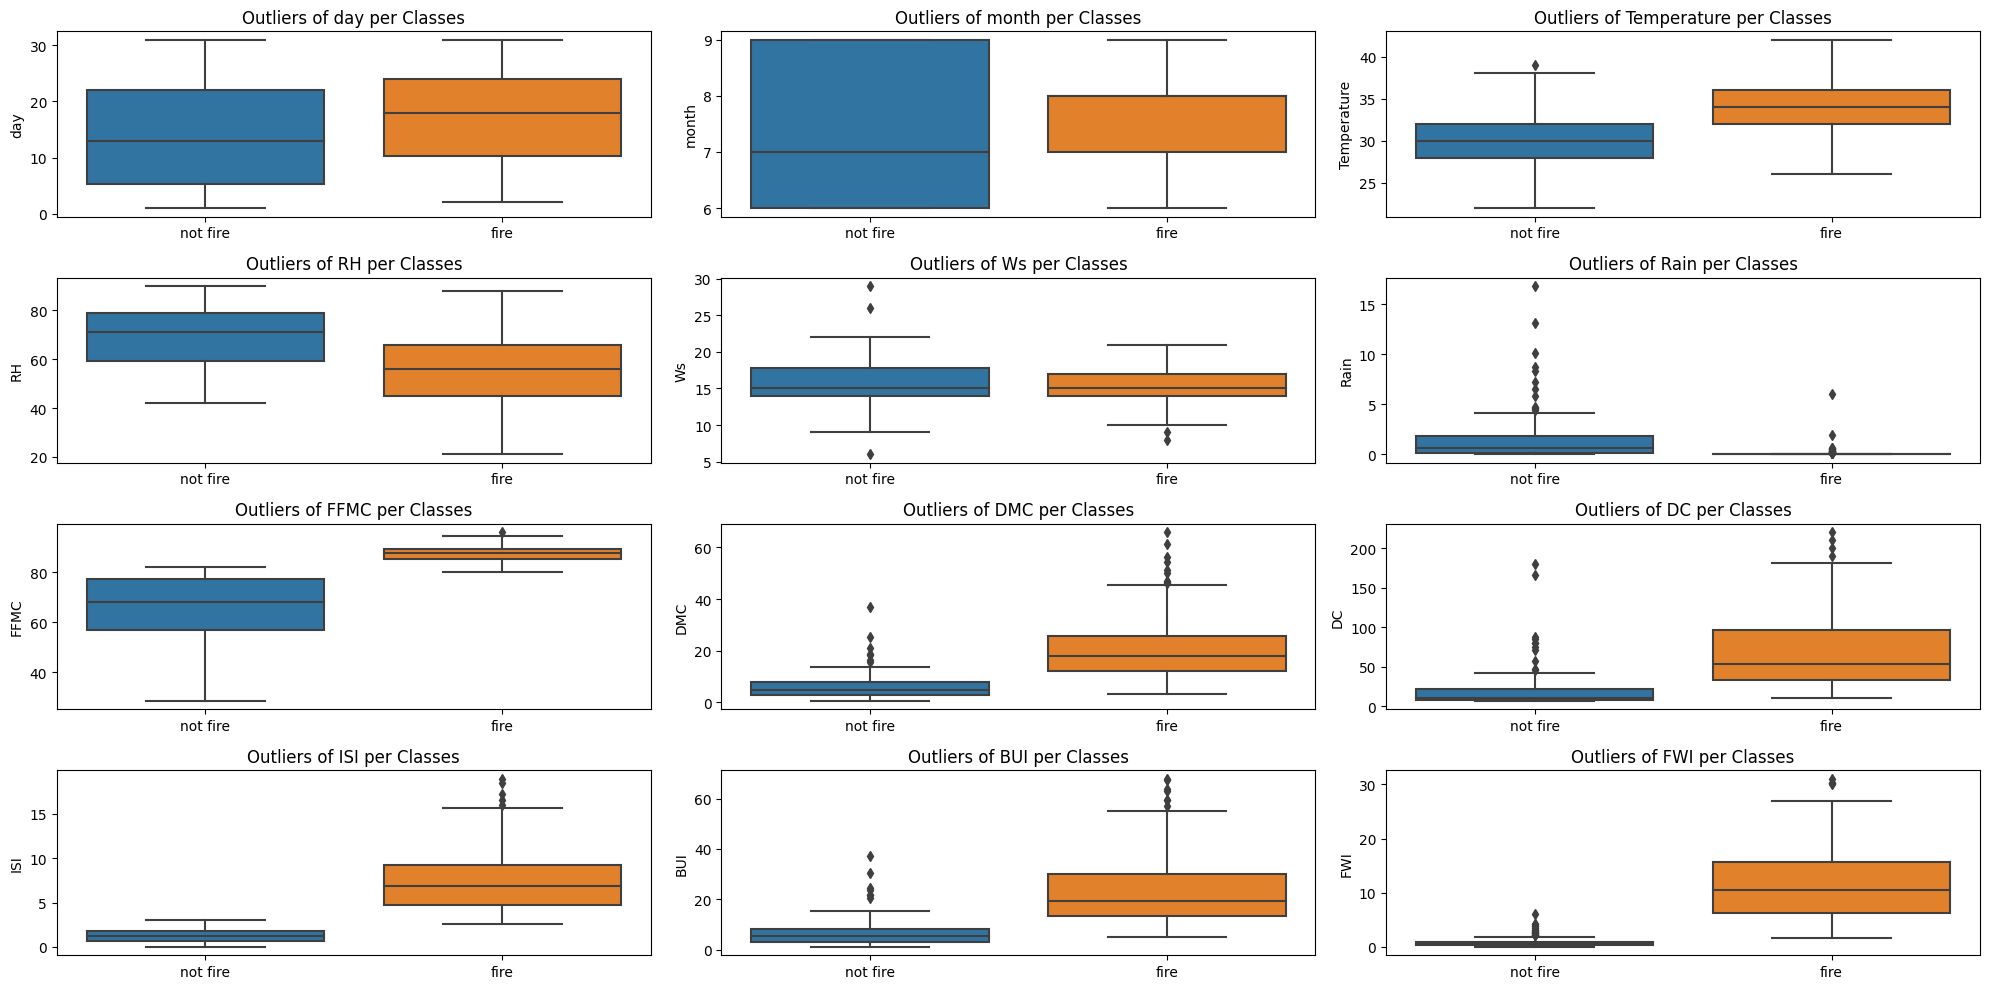

In [106]:
i = 1
plt.figure(figsize=(20,10))
for col in cols:
    if col not in ['year','Region', 'Classes']:
        plt.subplot(4, 3 , i)
        sns.boxplot(df, y = df[col], x = df['Classes'])
        plt.title(f'Outliers of {col} per Classes')
        plt.xlabel('')
        plt.tight_layout()
        i +=1

##### Report:
- The distribution of data is different per class 
- ISI has outliers in Fire class only
- FFMC has a lot of outlier but when it check per class it shows there is not any specific outliers per class, it means the outlier has some meaning in this field and we cannot remove them
- All the outlier of ISI columns also related to Fire Class 
- The distribution of outliers between each class in Ws is not same
- most of the fires happened in month number 7 and 8

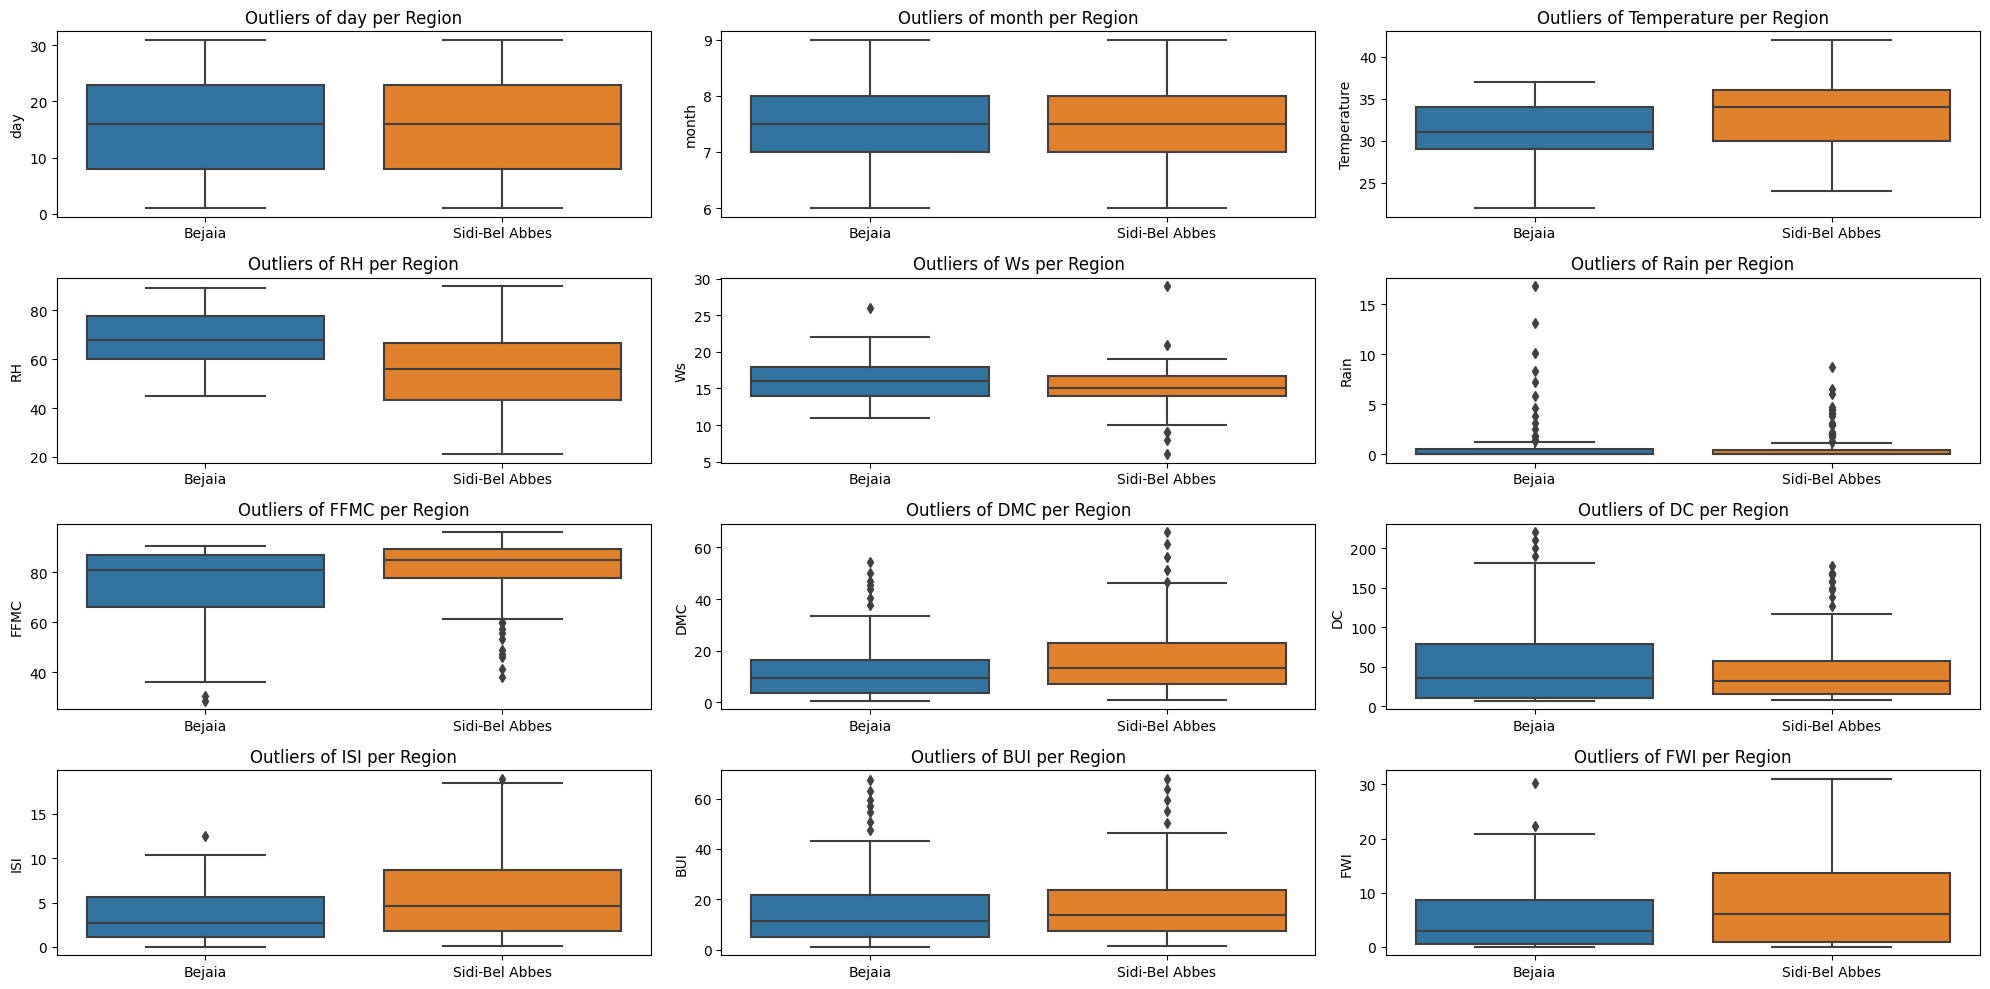

In [107]:
i = 1
plt.figure(figsize=(20,10))
for col in cols:
    if col not in ['year','Region', 'Classes']:
        plt.subplot(4, 3 , i)
        sns.boxplot(df, y = df[col], x = df['Region'])
        plt.title(f'Outliers of {col} per Region')
        plt.xlabel('')
        plt.tight_layout()
        i +=1

##### Report:
- The distribution of data per region is different also number of outliers for some of the field then maybe it is better to handle outliers per rigion

In [108]:
df_region0 = df[df['Region']== 'Bejaia']
df_region1 = df[df['Region']== 'Sidi-Bel Abbes']

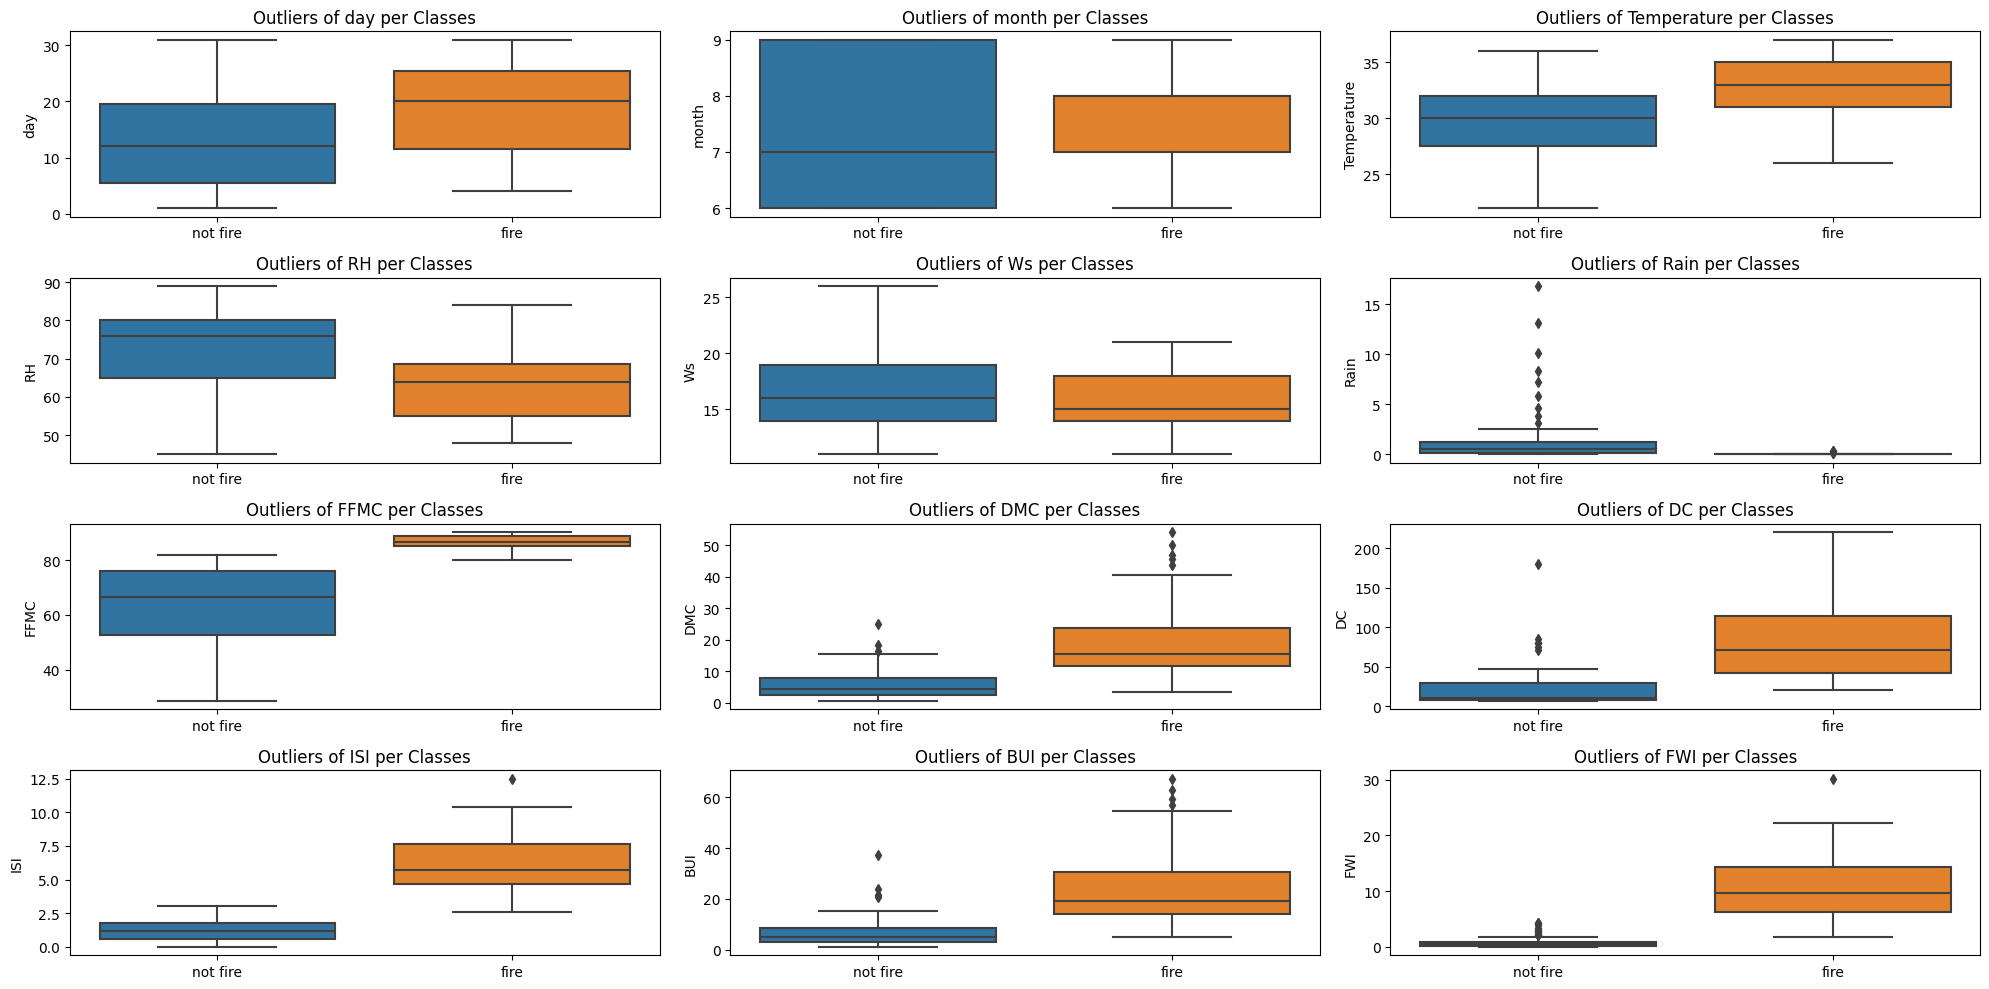

In [109]:
i = 1
plt.figure(figsize=(20,10))
for col in cols:
    if col not in ['year','Region', 'Classes']:
        plt.subplot(4, 3 , i)
        sns.boxplot(df_region0, y = df_region0[col], x = df_region0['Classes'])
        plt.title(f'Outliers of {col} per Classes')
        plt.xlabel('')
        plt.tight_layout()
        i +=1

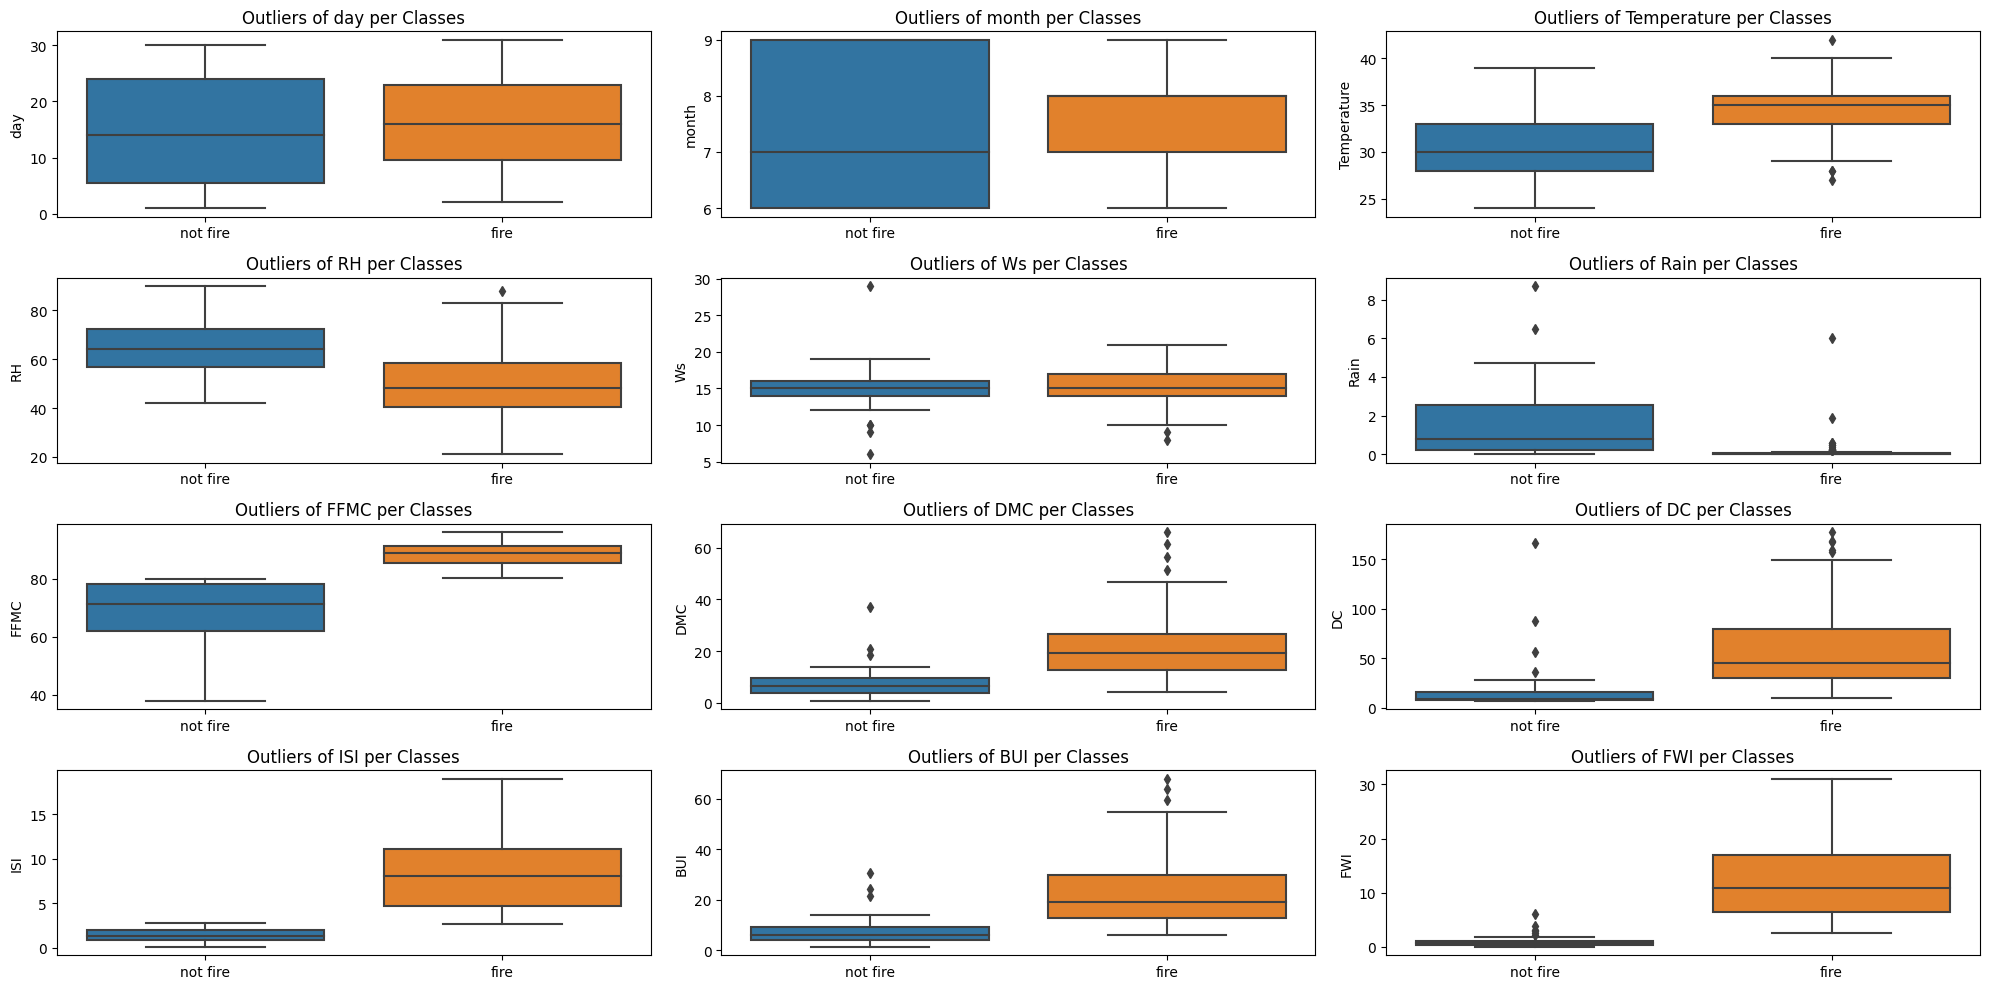

In [110]:
i = 1
plt.figure(figsize=(20,10))
for col in cols:
    if col not in ['year','Region', 'Classes']:
        plt.subplot(4, 3 , i)
        sns.boxplot(df_region1, y = df_region1[col], x = df_region1['Classes'])
        plt.title(f'Outliers of {col} per Classes')
        plt.xlabel('')
        plt.tight_layout()
        i +=1

In [111]:
print('Mean of Tempreture per class is : {} and the \n\nSTD is : {}'.format(df.groupby(['Classes'])['Temperature'].mean(), df.groupby(['Classes'])['Temperature'].std())) 

Mean of Tempreture per class is : Classes
fire        33.818841
not fire    30.028302
Name: Temperature, dtype: float64 and the 

STD is : Classes
fire        2.925437
not fire    3.345096
Name: Temperature, dtype: float64


In [112]:
print('Mean of Rain per class is : {} and the \n\nSTD of Rain per class is : {}'.format(df.groupby(['Classes'])['Rain'].mean() , df.groupby(['Classes'])['Rain'].std()))

Mean of Rain per class is : Classes
fire        0.097101
not fire    1.624528
Name: Rain, dtype: float64 and the 

STD of Rain per class is : Classes
fire        0.542358
not fire    2.745136
Name: Rain, dtype: float64


In [113]:
print('Mean of Humidity per class is : {} and the \n\nSTD of Humidity per class is : {}'.format(df.groupby(['Classes'])['RH'].mean() ,df.groupby(['Classes'])['RH'].std()))

Mean of Humidity per class is : Classes
fire        56.275362
not fire    69.311321
Name: RH, dtype: float64 and the 

STD of Humidity per class is : Classes
fire        14.276604
not fire    12.236840
Name: RH, dtype: float64


In [114]:
print('Mean of Wind per class is : {} and the \n\nSTD of Wind per class is : {}'.format(df.groupby(['Classes'])['Ws'].mean(), df.groupby(['Classes'])['Ws'].std()))

Mean of Wind per class is : Classes
fire        15.340580
not fire    15.716981
Name: Ws, dtype: float64 and the 

STD of Wind per class is : Classes
fire        2.309916
not fire    3.351630
Name: Ws, dtype: float64


**The probability of fire increases when Temperature is high and Rain, Humidity are low, the Wind speed does not impact on fire**

In [115]:
df.groupby(['Region', 'Classes'])['Temperature'].mean()

Region          Classes 
Bejaia          fire        32.881356
                not fire    29.587302
Sidi-Bel Abbes  fire        34.518987
                not fire    30.674419
Name: Temperature, dtype: float64

In [116]:
df.groupby(['Region', 'Classes'])['Rain'].mean()

Region          Classes 
Bejaia          fire        0.013559
                not fire    1.619048
Sidi-Bel Abbes  fire        0.159494
                not fire    1.632558
Name: Rain, dtype: float64

In [117]:
df.groupby(['Region', 'Classes'])['RH'].mean()

Region          Classes 
Bejaia          fire        63.644068
                not fire    72.031746
Sidi-Bel Abbes  fire        50.772152
                not fire    65.325581
Name: RH, dtype: float64

In [118]:
df.groupby(['Region', 'Classes'])['Ws'].mean()

Region          Classes 
Bejaia          fire        15.644068
                not fire    16.333333
Sidi-Bel Abbes  fire        15.113924
                not fire    14.813953
Name: Ws, dtype: float64

<AxesSubplot: xlabel='Region', ylabel='count'>

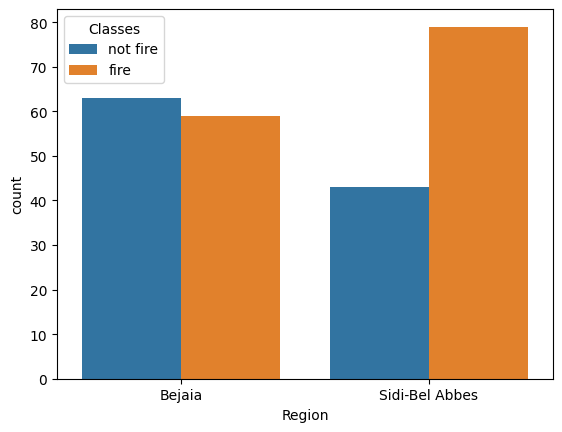

In [119]:
sns.countplot(df, x = df['Region'], hue=df['Classes'])

**The mean of both Region per Temperature, Rain and Wind are almost similar per Region but humidity of Bejaia is more and it is clear that impact on range of fire.**

In [120]:
df[df['Classes']=='fire']['month'].value_counts() / df[df['Classes']=='fire'].shape[0] * 100

8    36.956522
7    28.260870
6    18.115942
9    16.666667
Name: month, dtype: float64

The highest probabiliy of fire is 36.9% in 8th month 

## Multivatiate

<AxesSubplot: >

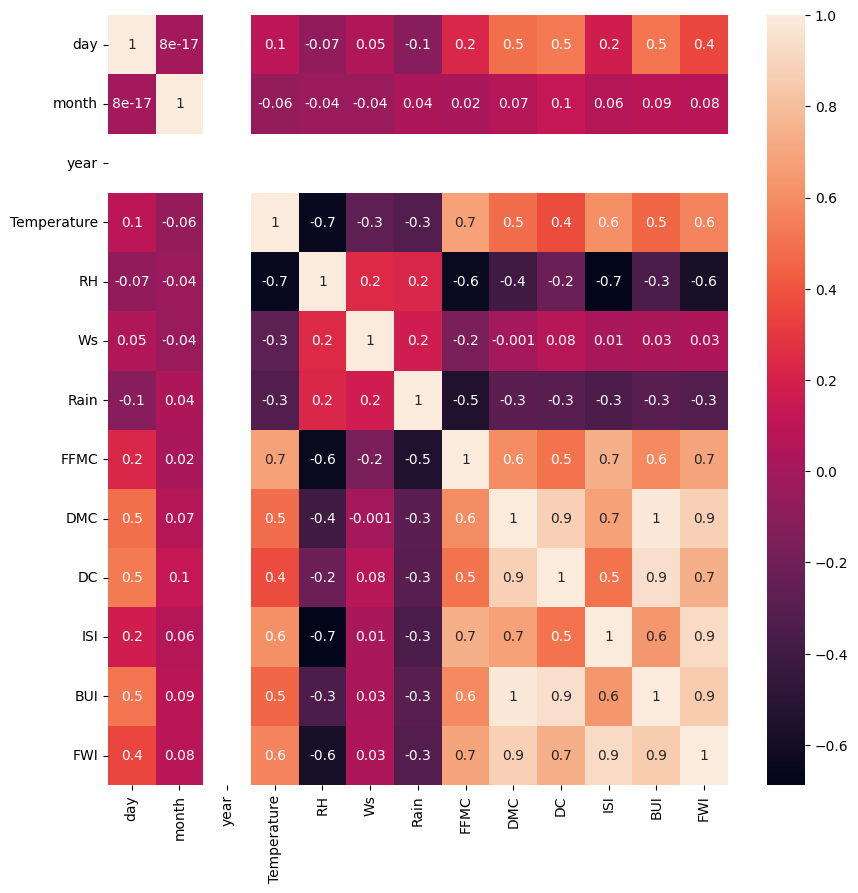

In [121]:
plt.figure(figsize=(10 ,10))
sns.heatmap(df.corr(), annot= True, fmt = '0.1g' )

**The heatmap shows high correlation is between BUI and DMC then during classification we can keep one of them**

#### Report:
- It is possible if we classify data per reigon we get higher performance, which should check during modeling
- based on the plots, there is some relation between outliers and probability of fire, then we will keep the and try to solve skewness with other techniques


### Handling outliers

In [122]:
def outliers_hadling(data, columns_name, q1_range= 0.25 , q3_range= 0.75):
    for col in columns_name :
        Q1 = data[col].quantile(q1_range)
        Q3 = data[col].quantile(q3_range)
        IQR = Q3 - Q1
        upper_limit=Q3 + (1.5 * IQR)
        lower_limit=Q1 - (1.5 * IQR)
        data.loc[data[col]<lower_limit,col]=lower_limit
        data.loc[data[col]>upper_limit,col]=upper_limit
    return data

In [123]:
df_region0 = outliers_hadling(df_region0, cols)
df_region1 = outliers_hadling(df_region1, cols)

In [124]:
df_final = pd.concat([df_region0, df_region1], axis=0 , ignore_index=True)
df_final.shape

(244, 15)

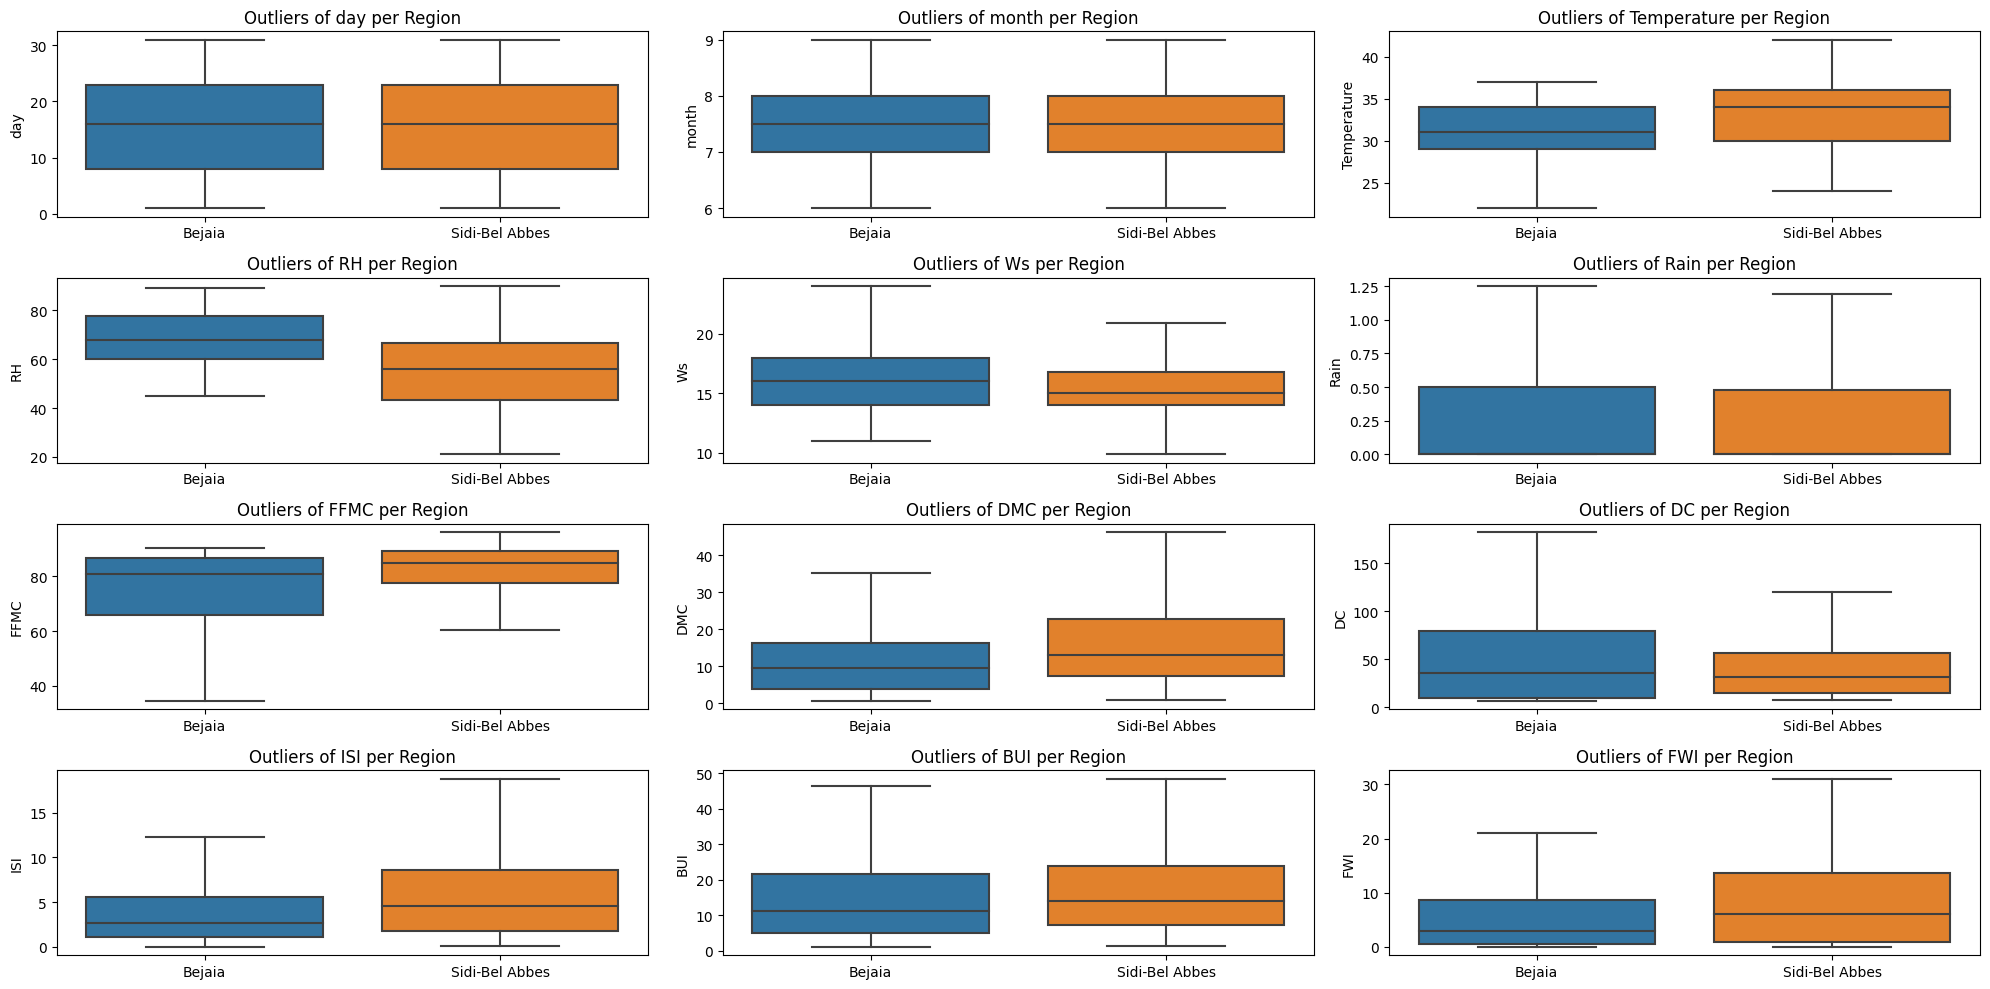

In [125]:
i = 1
plt.figure(figsize=(20,10))
for col in cols:
    if col not in ['year','Region', 'Classes']:
        plt.subplot(4, 3 , i)
        sns.boxplot(df, y = df_final[col], x = df_final['Region'])
        plt.title(f'Outliers of {col} per Region')
        plt.xlabel('')
        plt.tight_layout()
        i +=1

In [126]:
# Year is same for all the data then we drop it
df_final.drop(['year'], inplace=True, axis = 1)

## Modeling

In [147]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score , recall_score , f1_score,classification_report

In [210]:
# One hot encoding for Classes column
Class_dict = {1 : 'fire' , 0 : 'not fire'}
df_final['Classes'].replace('fire' , 1, inplace = True)
df_final['Classes'].replace('not fire' , 0, inplace = True)

# One hot encoding for Region column
region_dict = {0 : 'Bejaia' , 1 : 'Sidi-Bel Abbes'}
df_final['Region'].replace('Bejaia' , 0, inplace = True)
df_final['Region'].replace('Sidi-Bel Abbes' , 1, inplace = True)

In [279]:
y = df_final['Classes']
X = df_final.drop(['Classes', 'BUI'], axis = 1)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.15, shuffle= True, random_state=42 )
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((207, 12), (37, 12), (207,), (37,))

In [280]:
# Scale all data to be in same range as the unit of columns are different
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

In [281]:
# create and fit the model
svm_model = SVC(C = 3, kernel='poly')
svm_model.fit(scaled_train , y_train)
svm_model.score(scaled_train , y_train)

0.9903381642512077

In [282]:
# predict with created model on test data and print the evaluation metrics
y_pred = svm_model.predict(scaled_test)
print(confusion_matrix(y_test , y_pred) )
print(f'Accuracy of the model is: {accuracy_score(y_test , y_pred): 0.3f}')
print(f'Precision of the model is: {precision_score(y_test , y_pred): 0.3f}')
print(f'Recall of the model is:    {recall_score(y_test , y_pred): 0.3f}')
print(f'F1-score of the model is:  {f1_score(y_test , y_pred): 0.3f}')
print('Classification Report: \n',classification_report(y_test , y_pred))

[[16  1]
 [ 0 20]]
Accuracy of the model is:  0.973
Precision of the model is:  0.952
Recall of the model is:     1.000
F1-score of the model is:   0.976
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.95      1.00      0.98        20

    accuracy                           0.97        37
   macro avg       0.98      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



## Model per region

### Bejaia Region

In [283]:
# One hot encoding for Classes column
df_region0['Classes'].replace('fire' , 1, inplace = True)
df_region0['Classes'].replace('not fire' , 0, inplace = True)

# One hot encoding for Region column
y = df_region0['Classes']
X = df_region0.drop(['Classes', 'Region', 'BUI'], axis = 1)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.15, shuffle= True, random_state=42 )
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((103, 12), (19, 12), (103,), (19,))

In [284]:
# Scale data into same range
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

# Modeling
svm_model = SVC()
svm_model.fit(scaled_train , y_train)
# Calculate performace of train
svm_model.score(scaled_train , y_train)

0.9805825242718447

In [285]:
# Evaluate the model
y_pred = svm_model.predict(scaled_test)
print(confusion_matrix(y_test , y_pred) )
print(f'Accuracy of the model is: {accuracy_score(y_test , y_pred): 0.3f}')
print(f'Precision of the model is: {precision_score(y_test , y_pred): 0.3f}')
print(f'Recall of the model is:    {recall_score(y_test , y_pred): 0.3f}')
print(f'F1-score of the model is:  {f1_score(y_test , y_pred): 0.3f}')
print('Classification Report: \n',classification_report(y_test , y_pred))

[[11  0]
 [ 1  7]]
Accuracy of the model is:  0.947
Precision of the model is:  1.000
Recall of the model is:     0.875
F1-score of the model is:   0.933
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.88      0.93         8

    accuracy                           0.95        19
   macro avg       0.96      0.94      0.94        19
weighted avg       0.95      0.95      0.95        19



The model is underfit, the number of samples impact o results, them for this number of records mix of both data work better 

### Sidi-Bel Abbes Region

In [286]:
# One hot encoding for Classes column
df_region1['Classes'].replace('fire' , 1, inplace = True)
df_region1['Classes'].replace('not fire' , 0, inplace = True)

# One hot encoding for Region column
y = df_region1['Classes']
X = df_region1.drop(['Classes', 'Region', 'BUI'], axis = 1)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.15, shuffle= True, random_state=42 )
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((103, 12), (19, 12), (103,), (19,))

In [287]:
# Scale data into same range
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

# Modeling
svm_model = SVC()
svm_model.fit(scaled_train , y_train)
# Calculate performace of train
svm_model.score(scaled_train , y_train)

0.9320388349514563

In [288]:
# Evaluate the model
y_pred = svm_model.predict(scaled_test)
print(confusion_matrix(y_test , y_pred) )
print(f'Accuracy of the model is: {accuracy_score(y_test , y_pred): 0.3f}')
print(f'Precision of the model is: {precision_score(y_test , y_pred): 0.3f}')
print(f'Recall of the model is:    {recall_score(y_test , y_pred): 0.3f}')
print(f'F1-score of the model is:  {f1_score(y_test , y_pred): 0.3f}')
print('Classification Report: \n',classification_report(y_test , y_pred))

[[ 7  1]
 [ 0 11]]
Accuracy of the model is:  0.947
Precision of the model is:  0.917
Recall of the model is:     1.000
F1-score of the model is:   0.957
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.92      1.00      0.96        11

    accuracy                           0.95        19
   macro avg       0.96      0.94      0.94        19
weighted avg       0.95      0.95      0.95        19



model is underfit , dataset is small and also is imbalanced then model cannot train completely. 